# Quesiton 1 :[รวม 50 คะแนน] Customer Churn : Random Forest
ข้อนี้มี 2 ส่วน
 1. ส่วนที่ 1 : 32 คะแนน ใช้ไฟล์ Churn.csv เป็นการจัดการและวิเคราะห์ข้อมูล
 2. ส่วนที่ 2 : 18 คะแนน (ใช้ไฟล์ Churn2.csv หากนักศึกษาทำส่วนที่1 ไม่ได้) เป็นการสร้างและคัดเลือกแบบจำลอง
 


ให้นำเข้า Library ที่จะจำเป็นต้องใช้เท่านั้น  Library ที่ไม่ได้ใช้จะถูกหักคะแนน

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics

## ส่วนที่ 1 [รวม 32 คะแนน]
ให้ใช้ไฟล์ Churn.csv เพื่อทำส่วนนี้ 

### [2 คะแนน]
นำเข้าข้อมูลจาก Churn.csv เพื่อสร้าง dataframe ตามลักษณะที่ปรากฎ

In [6]:
churn_df = pd.read_csv('Churn.csv')
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


### [2 คะแนน]
แปลงชื่อตัวแปรให้ขึ้นต้นด้วยตัวใหญ่เสมอ
- เช่น CustomerID และ drop CustomerID เพราะไม่มีความหมาย ตามที่ปรากฏต่อไปนี้

In [8]:
name={'customerID':'CustomerID', 'gender':'Gender', 'tenure':'Tenure'}
churn_df.rename(columns=name, inplace=True)
churn_df.drop(columns='CustomerID', inplace=True)
churn_df.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### [3 คะแนน]
แสดงจำนวนข้อมูลที่เป็น na แยกตามตัวแปร(แต่ไม่นับ space) ในลักษณะที่ปรากฎต่อไปนี้ (จำนวนแต่ละครั้งอาจไม่เท่ากัน)

In [10]:
churn_df.isnull().sum()

Gender              2
SeniorCitizen       4
Partner             0
Dependents          5
Tenure              1
PhoneService        2
MultipleLines       4
InternetService     4
OnlineSecurity      1
OnlineBackup        1
DeviceProtection    2
TechSupport         2
StreamingTV         7
StreamingMovies     4
Contract            2
PaperlessBilling    0
PaymentMethod       4
MonthlyCharges      1
TotalCharges        2
Churn               0
dtype: int64

### [3 คะแนน]
ให้แทนช่องว่างทุกขนาดด้วย nan และนับจำนวนข้อมูล nan ทั้งหมด 
แยกตามตัวแปร ในลักษณะที่ปรากฎต่อไปนี้ (จำนวนแต่่ละครั้งอาจไม่เท่ากัน)

In [12]:
'' in churn_df.values

False

In [13]:
' ' in churn_df.values

True

In [14]:
'  ' in churn_df.values

True

In [15]:
'   ' in churn_df.values

False

In [16]:
churn_df.replace(' ', np.nan, inplace=True)
churn_df.replace('  ', np.nan, inplace=True)

In [17]:
churn_df.isnull().sum()

Gender               8
SeniorCitizen        7
Partner              3
Dependents           6
Tenure               3
PhoneService         4
MultipleLines        8
InternetService      5
OnlineSecurity       5
OnlineBackup         4
DeviceProtection     4
TechSupport          4
StreamingTV          7
StreamingMovies      6
Contract             6
PaperlessBilling     4
PaymentMethod        7
MonthlyCharges       5
TotalCharges        17
Churn                2
dtype: int64

###  [2 คะแนน]
ให้ drop ข้อมูลที่เป็น nan ทั้งหมด

In [19]:
churn_df.dropna(inplace=True)
churn_df.isnull().sum()

Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### [3 คะแนน] 
เปลี่ยนตัวแปรที่จำเป็นเป็นตัวเลข
- จากข้อมูลที่มี ให้ระบุว่าตัวแปรใดบ้างควรเป็นประเภทตัวเลข จากนั้นให้เปลี่ยนประเภทตัวแปรเหล่านั้นให้เป็น float

Tenure (ระยะเวลา), MonthlyCharges (จ่ายต่อเดือน)  และ TotalCharges (จ่ายทั้งหมด) ควรเป็นประเภทตัวเลข

In [22]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6928 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            6928 non-null   object
 1   SeniorCitizen     6928 non-null   object
 2   Partner           6928 non-null   object
 3   Dependents        6928 non-null   object
 4   Tenure            6928 non-null   object
 5   PhoneService      6928 non-null   object
 6   MultipleLines     6928 non-null   object
 7   InternetService   6928 non-null   object
 8   OnlineSecurity    6928 non-null   object
 9   OnlineBackup      6928 non-null   object
 10  DeviceProtection  6928 non-null   object
 11  TechSupport       6928 non-null   object
 12  StreamingTV       6928 non-null   object
 13  StreamingMovies   6928 non-null   object
 14  Contract          6928 non-null   object
 15  PaperlessBilling  6928 non-null   object
 16  PaymentMethod     6928 non-null   object
 17  MonthlyCharges    6

In [23]:
churn_df['Tenure'] = churn_df['Tenure'].astype(float)

In [24]:
churn_df['MonthlyCharges'] = churn_df['MonthlyCharges'].astype(float)

In [25]:
churn_df['TotalCharges'] = churn_df['TotalCharges'].astype(float)

In [26]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6928 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            6928 non-null   object 
 1   SeniorCitizen     6928 non-null   object 
 2   Partner           6928 non-null   object 
 3   Dependents        6928 non-null   object 
 4   Tenure            6928 non-null   float64
 5   PhoneService      6928 non-null   object 
 6   MultipleLines     6928 non-null   object 
 7   InternetService   6928 non-null   object 
 8   OnlineSecurity    6928 non-null   object 
 9   OnlineBackup      6928 non-null   object 
 10  DeviceProtection  6928 non-null   object 
 11  TechSupport       6928 non-null   object 
 12  StreamingTV       6928 non-null   object 
 13  StreamingMovies   6928 non-null   object 
 14  Contract          6928 non-null   object 
 15  PaperlessBilling  6928 non-null   object 
 16  PaymentMethod     6928 non-null   object 
 17  

###  [10 คะแนน]
วิเคราะห์และคัดเลือกตัวแปร
- จากข้อมูลข้างต้น ให้ใช้วิธีการทำกราฟ หรือ ตาราง แล้วให้เหตุผลเพื่อเลือกตัวแปรคิดว่ามีความสำคัญในการกำหนด Churn มา 6 ตัวแปร
- ให้คะแนนการให้เหตุผลสนับสนุนการคัดเลือกตัวแปร ดังนั้นให้แสดงการให้เหตุผลให้ชัดเจน

<Axes: xlabel='Churn', ylabel='count'>

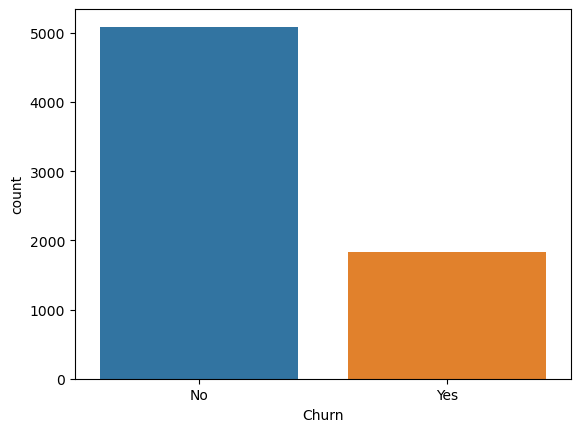

In [28]:
sns.countplot(data = churn_df , x = 'Churn')

ปกติ มี Churn = Yes น้อยกว่า Churn = No ค่อนข้างมาก

C:\Users\Tanyathep\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


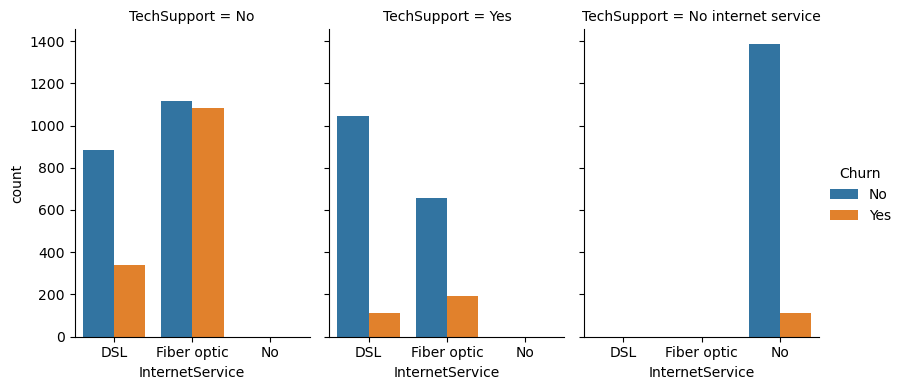

In [30]:
g = sns.catplot(x = "InternetService", col = "TechSupport", hue ="Churn",
                 data=churn_df, kind="count",
                height=4, aspect=.7);

ปกติ มี Churn = Yes น้อยกว่า Churn = No ค่อนข้างมาก
แต่ถ้า TechSupport = No และ InternetService = Fiber optic จะมีโอกาสที่ Churn = Yes มากกว่ากรณีอื่น ๆ ชัดเจน
จึงเลือกใช้ TechSupport และ InternetService เป็นตัวแปรที่คิดว่ามีความสำคัญในการกำหนด Churn

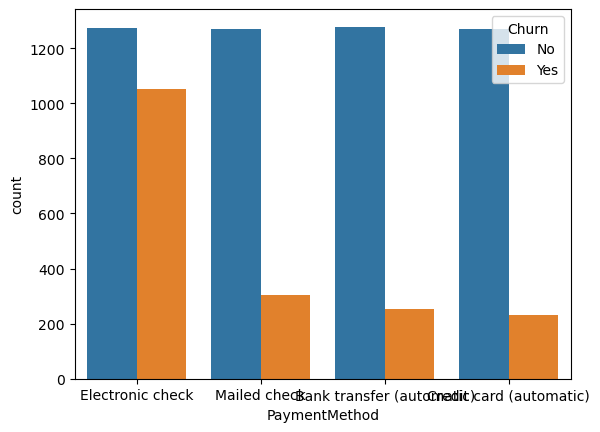

In [32]:
ax = sns.countplot(x = "PaymentMethod", hue ="Churn", data=churn_df)

ถ้า PaymentMethod เป็น Electronic check มีโอกาส Churn = Yes สูงกว่า PaymentMethod อื่น ๆ ชัดเจน จึงเลือกใช้ PaymentMethod เป็นตัวแปรที่คิดว่ามีความสำคัญในการกำหนด Churn

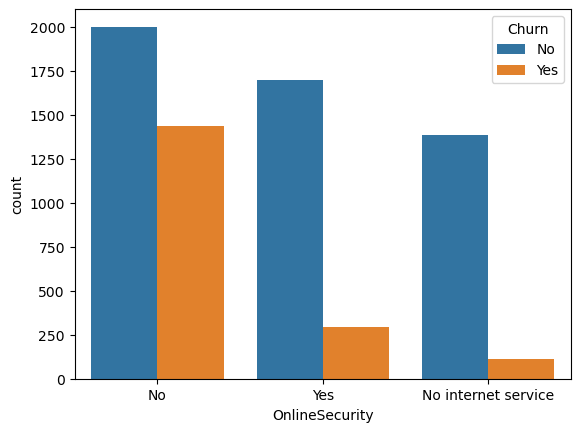

In [34]:
ax = sns.countplot(x = "OnlineSecurity", hue ="Churn", data=churn_df)

ถ้า OnlineSecurity = No มีโอกาส Churn = Yes มากกว่า OnlineSecurity = Yes ชัดเจน จึงเลือกใช้ OnlineSecurity เป็นตัวแปรที่คิดว่ามีความสำคัญในการกำหนด Churn

C:\Users\Tanyathep\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


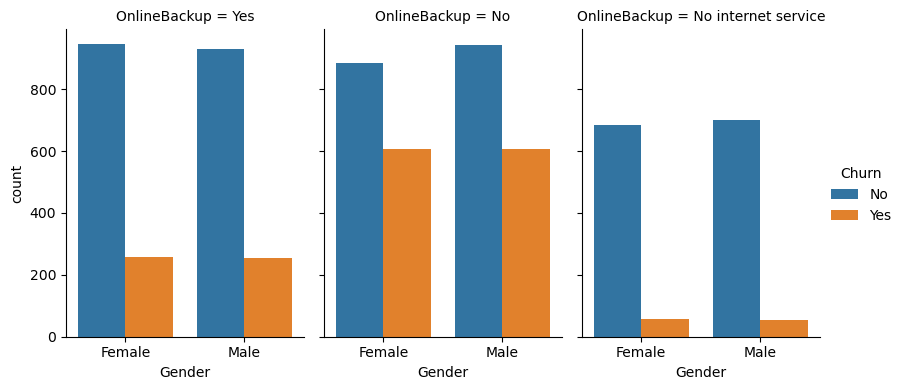

In [36]:
g = sns.catplot(x = "Gender", col = "OnlineBackup", hue ="Churn",
                 data=churn_df, kind="count",
                height=4, aspect=.7);

Gender ไม่ว่าจะเป็นอะไรจะให้สัดส่วนของ Churn Yes ต่อ No ใกล้เคียงกัน Gender จึงไม่ใช่ตัวแปรที่คิดว่ามีความสำคัญในการกำหนด Churn

ถ้า OnlineBackup = No มีโอกาส Churn = Yes มากกว่า OnlineBackup = Yes ชัดเจน จึงเลือกใช้ OnlineBackup เป็นตัวแปรที่คิดว่ามีความสำคัญในการกำหนด Churn

สรุป เลือก TechSupport, InternetService, PaymentMethod, OnlineSecurity, DeviceProtection และ OnlineBackup  เป็นตัวแปรที่คิดว่ามีความสำคัญในการกำหนด Churn

### [3 คะแนน]
สร้าง dataframe ใหม่ให้เหลือเพียงตัวแปรทั้ง 6 ตัวที่เลือก รวมกับตัวแปร Churn รวมเป็น 7 ตัวแปร

In [40]:
churn2_df = churn_df[['Churn', 'TechSupport', 'InternetService', 'PaymentMethod', 'OnlineSecurity', 'DeviceProtection', 'OnlineBackup']]
churn2_df

,Churn,TechSupport,InternetService,PaymentMethod,OnlineSecurity,DeviceProtection,OnlineBackup
0,No,No,DSL,Electronic check,No,No,Yes
1,No,No,DSL,Mailed check,Yes,Yes,No
2,Yes,No,DSL,Mailed check,Yes,No,Yes
3,No,Yes,DSL,Bank transfer (automatic),Yes,Yes,No
4,Yes,No,Fiber optic,Electronic check,No,No,No
...,...,...,...,...,...,...,...
7038,No,Yes,DSL,Mailed check,Yes,Yes,No
7039,No,No,Fiber optic,Credit card (automatic),No,Yes,Yes
7040,No,No,DSL,Electronic check,Yes,No,No
7041,Yes,No,Fiber optic,Mailed check,No,No,No


### [4 คะแนน]

ให้แปลงตัวแปรอื่นๆ(ที่ไม่ใช่ float) ให้เป็นตัวเลข

- เช่น Gender ให้เป็นข้อมูล  0 กับ 1 แทน Male กับ  Female 
- หากตัวแปรนั้น ๆ มี 3 ประเภทให้ระบุเป็น 0, 1, และ 2

- **หากนักศึกษาทำไม่ได้ให้ข้ามข้อนี้แล้วให้ใช้ไฟล์ Churn2.csv แทน แต่จะไม่ได้คะแนนในข้อนี้**

In [42]:
churn2_df['Churn'] = np.where((churn2_df['Churn'] == 'Yes'), 1, 0)
churn2_df['TechSupport'] = churn2_df['TechSupport'].map({'No':0, 'Yes':1, 'No internet service':2})
churn2_df['OnlineSecurity'] = churn2_df['OnlineSecurity'].map({'No':0, 'Yes':1, 'No internet service':2})
churn2_df['DeviceProtection'] = churn2_df['DeviceProtection'].map({'No':0, 'Yes':1, 
                                                                   'No internet service':2})
churn2_df['OnlineBackup'] = churn2_df['OnlineBackup'].map({'No':0, 'Yes':1, 'No internet service':2})
churn2_df['InternetService'] = churn2_df['InternetService'].map({'No':0, 'Fiber optic':1, 'DSL':2})
churn2_df['PaymentMethod'] = churn2_df['PaymentMethod'].map({'Electronic check':0, 'Mailed check':1,
                                                             'Bank transfer (automatic)':2, 
                                                             'Credit card (automatic)':3})
churn2_df

C:\Users\Tanyathep\AppData\Local\Temp\ipykernel_12880\1846329868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn2_df['Churn'] = np.where((churn2_df['Churn'] == 'Yes'), 1, 0)
C:\Users\Tanyathep\AppData\Local\Temp\ipykernel_12880\1846329868.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn2_df['TechSupport'] = churn2_df['TechSupport'].map({'No':0, 'Yes':1, 'No internet service':2})
C:\Users\Tanyathep\AppData\Local\Temp\ipykernel_12880\1846329868.py:3: SettingWithCopyWarning: 
A value is tryi

,Churn,TechSupport,InternetService,PaymentMethod,OnlineSecurity,DeviceProtection,OnlineBackup
0,0,0,2,0,0,0,1
1,0,0,2,1,1,1,0
2,1,0,2,1,1,0,1
3,0,1,2,2,1,1,0
4,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...
7038,0,1,2,1,1,1,0
7039,0,0,1,3,0,1,1
7040,0,0,2,0,1,0,0
7041,1,0,1,1,0,0,0


## ส่วนที่ 2 [รวม 18 คะแนน]
1. หากนักศึกษาทำส่วนที่ 1 ได้ ให้ใช้ dataframe ที่ทำได้แล้วทำต่อเนื่องต่อไป

2. หากนักศึกษาทำในส่วนที่ 1ไม่ได้ ให้เริ่มส่วนนี้โดยใช้ไฟล์ Churn2.csv จากนั้นตัดให้เลือกเก็บเฉพาะตัวแปรที่คิดว่าเหมาะสมไว้ 6 ตัวพร้อมกับตัวแปร Churn อีกหนึ่งตัวรวมเป็น  7 ตัวแปร

3. ใช้แบบจำลอง Random Forest ในคัดกรอง

In [44]:
## -- Codes -- ## เฉพาะคนที่ทำส่วนที่ 1 ไม่ได้



### [2 คะแนน]
เติม code ให้สมบูรณ์


In [46]:
X = churn2_df.drop(columns = 'Churn')
y = churn2_df.Churn

Test_size   = 0.3    # 0 to 1
Random_seed = 80247 # ใส่เลขทะเบียน 5 ตัวท้าย

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = Test_size,
                                                    random_state = Random_seed)

### [16 คะแนน]
หาแบบจำลองที่เหมาะสมจากแบบจำลอง Random Forest

กำหนดให้ทางเลือกการกำหนดแบบจำลองเป็นดังนี้
 1. ให้ใช้ตัวแปรคุณลักษณะทั้ง 6 ตัวที่เลือกมา
 2. เกณฑ์การคัดกรองเป็นไปได้ระหว่าง Gini หรือ Entropy
 3. จำนวนต้นไม้เป็นไปได้ตั้งแต่ 2, 3, 4, 5 ไปจนถึง 10 ต้น
 4. ความลึกของลำดับการคัดกรอง (max depth) เป็นไปได้ตั้งแต่ 2, 3, 4, 5 
 
จากทางเลือกของแบบจำลอง ให้แสดงการค้นหาและระบุว่าแบบจำลองใดเป็นแบบจำลองที่ดีที่สุด
 1. ใช้ คะแนน precision ของการทำนาย Churn จากชุดข้อมูลทดสอบ (test data) เป็นเกณฑ์ในการเลือก
 2. เมื่อได้แบบจำลองที่ดีที่สุดแล้วให้ระบุว่าข้อกำหนดแบบจำลองคือแบบจำลองใด
 3. เมื่อได้แบบจำลองที่ดีที่สุดแล้ว ให้ใช้แบบจำลองนั้นแสดงตาราง Classification Report ของทั้ง train และ test sample
 4. เมื่อได้แบบจำลองที่ดีที่สุดแล้ว ให้ใช้แบบจำลองนั้น จงระบุตัวแปรคุณลักษณะ (Feature Variable) ที่ดีที่สุด 3 ตัวแปรแรก

In [48]:
criterions = ['entropy','gini']
n_estimators = list(range(2,11))
random_state_i = Random_seed
max_depth_x = list(range(2,6))

models= []
i = 0
for criterion_i in ['entropy','gini']:
    for n_estimators_i in n_estimators:
        for max_depth_i in max_depth_x:
            i = i+1 
            model = RandomForestClassifier(
                        criterion= criterion_i,
                        max_depth= max_depth_i,
                        n_estimators= n_estimators_i, 
                        random_state= random_state_i,
                        bootstrap = True # random choose data to make a tree
                        )
            models.append(['RF_'+str(i), model])

In [49]:
score_all = []

for model_name, model in models:

    model.fit(X_train, y_train) 
    fi  = model.feature_importances_
    
    for sample  in ['train','test']:
        X_ = eval('X_'+sample)
        y_ = eval('y_'+sample)
        
        accu_score = model.score(X_,y_)

        prec_score  = metrics.precision_score(y_,model.predict(X_),average= None)

        recall_score  = metrics.recall_score(y_,model.predict(X_),average= None)
        
        score_all.append([model_name,sample,accu_score,prec_score,recall_score,fi])

df_report =pd.DataFrame(score_all,columns=['model','data','accuracy','precision','recall','importantF'])
df_report

C:\Users\Tanyathep\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tanyathep\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tanyathep\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tanyathep\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:

,model,data,accuracy,precision,recall,importantF
0,RF_1,train,0.770262,"[0.7938417127736348, 0.6286127167630058]","[0.9277481023334271, 0.336687306501548]","[0.13189006388791943, 0.0, 0.12241151967912632..."
1,RF_1,test,0.772006,"[0.7916207276736494, 0.6377358490566037]","[0.9373368146214099, 0.30895795246800734]","[0.13189006388791943, 0.0, 0.12241151967912632..."
2,RF_2,train,0.768612,"[0.7830737037898163, 0.6551094890510949]","[0.9468653359572674, 0.27786377708978327]","[0.08055770183575885, 0.05455190492622979, 0.1..."
3,RF_2,test,0.770563,"[0.7783641160949868, 0.6902173913043478]","[0.9627937336814621, 0.23217550274223034]","[0.08055770183575885, 0.05455190492622979, 0.1..."
4,RF_3,train,0.772943,"[0.8096318709026727, 0.608154020385051]","[0.902727017149283, 0.41563467492260064]","[0.14653063700063088, 0.07819748269314566, 0.1..."
...,...,...,...,...,...,...
139,RF_70,test,0.770563,"[0.7783641160949868, 0.6902173913043478]","[0.9627937336814621, 0.23217550274223034]","[0.30067432800473265, 0.06650536649265108, 0.1..."
140,RF_71,train,0.776861,"[0.8103837471783296, 0.6218097447795824]","[0.9083497329210009, 0.4148606811145511]","[0.2883459351911448, 0.09603311895336761, 0.12..."
141,RF_71,test,0.777297,"[0.805603201829617, 0.6272727272727273]","[0.9197127937336814, 0.37842778793418647]","[0.2883459351911448, 0.09603311895336761, 0.12..."
142,RF_72,train,0.776861,"[0.8103837471783296, 0.6218097447795824]","[0.9083497329210009, 0.4148606811145511]","[0.28450489731275763, 0.11819968701611613, 0.1..."


In [50]:
df_report.pivot( index = 'model', columns = 'data', values= 'precision')

data,test,train
model,,
RF_1,"[0.7916207276736494, 0.6377358490566037]","[0.7938417127736348, 0.6286127167630058]"
RF_10,"[0.7876973326075123, 0.6487603305785123]","[0.7909307875894988, 0.6312594840667678]"
RF_11,"[0.8, 0.631578947368421]","[0.8017177914110429, 0.6253229974160207]"
RF_12,"[0.8160851567120048, 0.6082474226804123]","[0.8186714542190305, 0.6157894736842106]"
RF_13,"[0.7916207276736494, 0.6377358490566037]","[0.7938417127736348, 0.6286127167630058]"
...,...,...
RF_70,"[0.7783641160949868, 0.6902173913043478]","[0.7830737037898163, 0.6551094890510949]"
RF_71,"[0.805603201829617, 0.6272727272727273]","[0.8103837471783296, 0.6218097447795824]"
RF_72,"[0.805603201829617, 0.6272727272727273]","[0.8103837471783296, 0.6218097447795824]"


In [51]:
data_i = 'test'
score_i = 'precision'

a = df_report.pivot(index = "model",  columns= 'data', values= score_i)[data_i]
n_ = a.iloc[0].shape[0]
col_names = [ score_i + '_' + str(i)+'_'+data_i for i in range(n_)]
a = pd.DataFrame( a.tolist(),columns= col_names)
a

,precision_0_test,precision_1_test
0,0.791621,0.637736
1,0.787697,0.648760
2,0.800000,0.631579
3,0.816085,0.608247
4,0.791621,0.637736
...,...,...
67,0.778364,0.690217
68,0.805603,0.627273
69,0.805603,0.627273
70,0.804224,0.623853


In [52]:
a.max()

precision_0_test    0.821343
precision_1_test    0.690217
dtype: float64

In [53]:
a[a.precision_1_test >= 0.69]

,precision_0_test,precision_1_test
11,0.778364,0.690217
18,0.778364,0.690217
23,0.778364,0.690217
26,0.778364,0.690217
27,0.778364,0.690217
31,0.778364,0.690217
36,0.778364,0.690217
55,0.778364,0.690217
58,0.778364,0.690217
62,0.778364,0.690217


In [54]:
b = a[a.precision_1_test >= 0.69]
list(b.index)

[11, 18, 23, 26, 27, 31, 36, 55, 58, 62, 65, 67]

In [55]:
c = df_report.pivot( index = 'model', columns = 'data', values= 'precision')
for x in list(b.index):
    d = c.iloc[x,:]
    print(d)

data
test     [0.7783641160949868, 0.6902173913043478]
train    [0.7830737037898163, 0.6551094890510949]
Name: RF_2, dtype: object
data
test     [0.7783641160949868, 0.6902173913043478]
train    [0.7830737037898163, 0.6551094890510949]
Name: RF_26, dtype: object
data
test     [0.7783641160949868, 0.6902173913043478]
train    [0.7830737037898163, 0.6551094890510949]
Name: RF_30, dtype: object
data
test     [0.7783641160949868, 0.6902173913043478]
train    [0.7830737037898163, 0.6551094890510949]
Name: RF_33, dtype: object
data
test     [0.7783641160949868, 0.6902173913043478]
train    [0.7830737037898163, 0.6551094890510949]
Name: RF_34, dtype: object
data
test     [0.7783641160949868, 0.6902173913043478]
train    [0.7830737037898163, 0.6551094890510949]
Name: RF_38, dtype: object
data
test     [0.7783641160949868, 0.6902173913043478]
train    [0.7830737037898163, 0.6551094890510949]
Name: RF_42, dtype: object
data
test     [0.7783641160949868, 0.6902173913043478]
train    [0.7830737037

In [56]:
y = [1,25,29,32,33,37,41,5,61,65,68,69]
for x in y:
    print(models[x])

['RF_2', RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=2,
                       random_state=80247)]
['RF_26', RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=8,
                       random_state=80247)]
['RF_30', RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=9,
                       random_state=80247)]
['RF_33', RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators=10,
                       random_state=80247)]
['RF_34', RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=10,
                       random_state=80247)]
['RF_38', RandomForestClassifier(max_depth=3, n_estimators=2, random_state=80247)]
['RF_42', RandomForestClassifier(max_depth=3, n_estimators=3, random_state=80247)]
['RF_6', RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=3,
                       random_state=80247)]
['RF_62', RandomForestClassifier(max_depth=3, n_estimators=8, random_sta

แบบจำลองที่ดีที่สุดคือ RF_33 และ RF_69 เพราะได้ precision ของการทำนาย Churn = 1 มากที่สุดหรือก็คือ precision ของการทำนายว่าลูกค้าคนนี้จะเลิกเป็นลูกค้าเรามากที่สุด โดยใช้ max_depth น้อยที่สุดเพื่อไม่ให้เจอปัญหา model overfitting และ n_estimators มากที่สุดเพื่อเพิ่ม model accuracy

รายละเอียดแบบจำลองที่ดีที่สุดคือ

In [59]:
print(models[32])
print(models[68])

['RF_33', RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators=10,
                       random_state=80247)]
['RF_69', RandomForestClassifier(max_depth=2, n_estimators=10, random_state=80247)]


แสดงตาราง Classification Report ของทั้ง train และ test sample

In [61]:
RForest= RandomForestClassifier(
            criterion= 'entropy',
            n_estimators= 10, #default = 100 #จำนวนต้นไม้
            max_depth = 2,
            random_state= 80247, #default = None
            bootstrap = False #default = True
            )
models = RForest
model = models
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=2,
                       n_estimators=10, random_state=80247)

In [62]:
## Model selection metric 
cf_report = classification_report(y_train, model.predict(X_train),digits= 4)
###  These two are equivalent.
score = metrics.accuracy_score(y_train,model.predict(X_train))
score = model.score(X_train,y_train)

print('RF_33 train')
print(f'Classification Report = \n{cf_report}', end='\n'*2)

RF_33 train
Classification Report = 
              precision    recall  f1-score   support

           0     0.7831    0.9469    0.8572      3557
           1     0.6551    0.2779    0.3902      1292

    accuracy                         0.7686      4849
   macro avg     0.7191    0.6124    0.6237      4849
weighted avg     0.7490    0.7686    0.7328      4849




In [63]:
## Model selection metric 
cf_report = classification_report(y_test, model.predict(X_test),digits= 4)
###  These two are equivalent.
score = metrics.accuracy_score(y_test,model.predict(X_test))
score = model.score(X_test,y_test)

print('RF_33 test')
print(f'Classification Report = \n{cf_report}', end='\n'*2)

RF_33 test
Classification Report = 
              precision    recall  f1-score   support

           0     0.7784    0.9628    0.8608      1532
           1     0.6902    0.2322    0.3475       547

    accuracy                         0.7706      2079
   macro avg     0.7343    0.5975    0.6041      2079
weighted avg     0.7552    0.7706    0.7257      2079




In [64]:
RForest= RandomForestClassifier(
            criterion= 'gini',
            n_estimators= 10, #default = 100 #จำนวนต้นไม้
            max_depth = 2,
            random_state= 80247, #default = None
            bootstrap = False #default = True
            )
models = RForest
model = models
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=2, n_estimators=10,
                       random_state=80247)

In [65]:
## Model selection metric 
cf_report = classification_report(y_train, model.predict(X_train),digits= 4)
###  These two are equivalent.
score = metrics.accuracy_score(y_train,model.predict(X_train))
score = model.score(X_train,y_train)

print('RF_69 train')
print(f'Classification Report = \n{cf_report}', end='\n'*2)

RF_69 train
Classification Report = 
              precision    recall  f1-score   support

           0     0.7831    0.9469    0.8572      3557
           1     0.6551    0.2779    0.3902      1292

    accuracy                         0.7686      4849
   macro avg     0.7191    0.6124    0.6237      4849
weighted avg     0.7490    0.7686    0.7328      4849




In [66]:
## Model selection metric 
cf_report = classification_report(y_test, model.predict(X_test),digits= 4)
###  These two are equivalent.
score = metrics.accuracy_score(y_test,model.predict(X_test))
score = model.score(X_test,y_test)

print('RF_69 test')
print(f'Classification Report = \n{cf_report}', end='\n'*2)

RF_69 test
Classification Report = 
              precision    recall  f1-score   support

           0     0.7784    0.9628    0.8608      1532
           1     0.6902    0.2322    0.3475       547

    accuracy                         0.7706      2079
   macro avg     0.7343    0.5975    0.6041      2079
weighted avg     0.7552    0.7706    0.7257      2079




หาตัวแปรคุณลักษณะ (Feature Variable) ที่ดีที่สุด 3 ตัวแปรแรก

In [68]:
e = pd.DataFrame(df_report.importantF.tolist(),columns= list(X.columns))
e

,TechSupport,InternetService,PaymentMethod,OnlineSecurity,DeviceProtection,OnlineBackup
0,0.131890,0.000000,0.122412,0.368110,0.087861,0.289727
1,0.131890,0.000000,0.122412,0.368110,0.087861,0.289727
2,0.080558,0.054552,0.113230,0.439044,0.085956,0.226660
3,0.080558,0.054552,0.113230,0.439044,0.085956,0.226660
4,0.146531,0.078197,0.142956,0.343433,0.080979,0.207904
...,...,...,...,...,...,...
139,0.300674,0.066505,0.126576,0.333631,0.049463,0.123150
140,0.288346,0.096033,0.125414,0.341138,0.034223,0.114847
141,0.288346,0.096033,0.125414,0.341138,0.034223,0.114847
142,0.284505,0.118200,0.146460,0.292723,0.045088,0.113024


In [69]:
print('RF_33')
e.iloc[64:66,:]

RF_33


,TechSupport,InternetService,PaymentMethod,OnlineSecurity,DeviceProtection,OnlineBackup
64,0.280082,0.076403,0.133173,0.381362,0.055496,0.073484
65,0.280082,0.076403,0.133173,0.381362,0.055496,0.073484


ตัวแปรคุณลักษณะ (Feature Variable) ที่ดีที่สุด 3 ตัวแปรแรกของแบบจำลอง RF_33 คือ OnlineSecurity, TechSupport และ PaymentMethod

In [71]:
print('RF_69')
e.iloc[136:138,:]

RF_69


,TechSupport,InternetService,PaymentMethod,OnlineSecurity,DeviceProtection,OnlineBackup
136,0.337443,0.021852,0.117481,0.377899,0.023374,0.12195
137,0.337443,0.021852,0.117481,0.377899,0.023374,0.12195


ตัวแปรคุณลักษณะ (Feature Variable) ที่ดีที่สุด 3 ตัวแปรแรกของแบบจำลอง RF_69 คือ OnlineSecurity, TechSupport และ PaymentMethod